# **ML Titanic**

---



# 1. Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import gmean

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import re

Using TensorFlow backend.


# 2. Random seed

In [2]:
np.random.seed(42)

# 3. Load and preparing data

In [3]:
df_test = pd.read_csv('../input/titanic/test.csv')
df_train = pd.read_csv('../input/titanic/train.csv')

In [4]:
data = pd.concat([df_train, df_test])

In [5]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


#### Adding title, encoding sex, filling age

In [6]:
corpus = list(data.Name)
rearrenged_title = [re.sub('(.*, )|(\\..*)','', text) for text in corpus]
title = [''.join(word) for word in rearrenged_title]

In [7]:
data['title'] = title

In [8]:
labelencoder = LabelEncoder()

In [9]:
data['Sex'] = labelencoder.fit_transform(data['Sex'])

In [10]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236,Mr
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758,Dona
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262,Mr
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,Mr


In [11]:
df_train = data[data['PassengerId'].isin(df_train['PassengerId'])]

In [12]:
df_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0.0,211536,Rev
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1.0,112053,Miss
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0.0,W./C. 6607,Miss
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1.0,111369,Mr


In [13]:
df_test = data[data['PassengerId'].isin(df_test['PassengerId'])]

In [14]:
df_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,1,0,NaN,330911,Mr
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,NaN,363272,Mrs
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,NaN,240276,Mr
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,NaN,315154,Mr
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,NaN,3101298,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236,Mr
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758,Dona
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262,Mr
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,Mr


In [15]:
df_train['Age'] = df_train.groupby('Sex')['Age'].apply(lambda x: x.ffill().bfill())
df_test['Age'] = df_test.groupby('Sex')['Age'].apply(lambda x: x.ffill().bfill())

In [16]:
print(df_train.shape, df_test.shape)

(891, 13) (418, 13)


# Target encoding

In [17]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [18]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [19]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

#### - title

In [20]:
train_title_mean, test_title_mean = mean_target_encoding(train=df_train, test=df_test, target='Survived', categorical='title', alpha=5)

In [21]:
df_train['title_mean'] = train_title_mean
df_test['title_mean'] = test_title_mean

#### - age

In [22]:
train_age_mean, test_age_mean = mean_target_encoding(train=df_train, test=df_test, target='Survived', categorical='Age', alpha=5)

In [23]:
df_train['age_mean'] = train_age_mean
df_test['age_mean'] = test_age_mean

#### - class

In [24]:
train_class_mean, test_class_mean = mean_target_encoding(train=df_train, test=df_test, target='Survived', categorical='Pclass', alpha=5)

In [25]:
df_train['class_mean'] = train_class_mean
df_test['class_mean'] = test_class_mean

#### - fare

In [26]:
train_fare_mean, test_fare_mean = mean_target_encoding(train=df_train, test=df_test, target='Survived', categorical='Fare', alpha=5)

In [27]:
df_train['fare_mean'] = train_fare_mean
df_test['fare_mean'] = test_fare_mean

In [28]:
df_train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,title_mean,age_mean,class_mean,fare_mean
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,0.161054,0.346100,0.249996,0.133240
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,0.769664,0.523142,0.592618,0.378682
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,0.653734,0.225311,0.230151,0.391515
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,0.760289,0.470882,0.612672,0.425588
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,0.167324,0.519358,0.258570,0.148631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,1,0,0.0,211536,Rev,0.214275,0.477139,0.457243,0.380249
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,0,0,1.0,112053,Miss,0.653734,0.318538,0.612672,0.547185
888,19.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,0,1,0.0,W./C. 6607,Miss,0.691957,0.380742,0.258570,0.324204
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,1,0,1.0,111369,Mr,0.156146,0.225311,0.612672,0.547185


# 4. Fitting simple models

In [ ]:
train_test_split

In [29]:
x_train = df_train[['title_mean', 'age_mean', 'class_mean', 'fare_mean']].reset_index(drop = True)
x_test = df_test[['title_mean', 'age_mean', 'class_mean', 'fare_mean']].reset_index(drop = True)
y_train = df_train.Survived

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = np.ravel(y_train)
x_test = scaler.transform(x_test)

In [31]:
lr = LogisticRegression(n_jobs=-1, random_state=42)

param_grid={'penalty' : ['l1', 'l2'], 
            'fit_intercept': [True, False],
            'max_iter' : [1000, 5000],
            'C' : [0.001, 0.1, 0.8, 1],
            'class_weight' : [None, 'balanced', {0: 0.9, 1: 0.1}]}

lr_cv = GridSearchCV(estimator=lr,
                     param_grid=param_grid,
                     scoring='f1', cv=3,
                     verbose=1, n_jobs=-1)

lr_cv.fit(x_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    5.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.8, 1],
                         'class_weight': [None, 'balanced', {0: 0.9, 1: 0.1}],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 5000], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [32]:
sgd = SGDClassifier(n_jobs=-1, random_state=42)

param_grid = {'loss' : ['log', 'modified_huber'],
              'penalty' : ['l1', 'l2'], 
              'fit_intercept' : [True, False],
              'max_iter' : [5, 1000, 5000],
              'shuffle' : [True, False],
              'learning_rate' : ['optimal'],
              'validation_fraction' : [0.1, 0.2, 0.3, 0.4]
             }

sgd_cv = GridSearchCV(estimator=sgd,
                     param_grid=param_grid,
                     scoring='f1', cv=3,
                     verbose=1, n_jobs=-1)


sgd_cv.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:    1.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'learning_rate': ['optimal'],
                         'loss': ['log', 'modified_huber'],
                         'max_iter': [5, 10

In [33]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced', max_features='auto', n_jobs=-1)
param_grid = {'max_depth': np.arange(10, 20), 'min_samples_leaf': np.arange(1, 20, 2), 'min_samples_split': np.arange(2, 20, 2)}
    
rfc_c_weighed = GridSearchCV(estimator=rfc,
                            param_grid=param_grid,
                            scoring='f1', cv=3,
                            verbose=1, n_jobs=-1)

rfc_c_weighed.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                              

In [34]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_features='auto')
param_grid = {'max_depth': np.arange(10, 20), 'min_samples_leaf': np.arange(1, 20, 2), 'min_samples_split': np.arange(2, 20, 2)}
    
dtc_c_weighed = GridSearchCV(estimator=dtc,
                            param_grid=param_grid,
                            scoring='f1', cv=3,
                            verbose=1, n_jobs=-1)

dtc_c_weighed.fit(x_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2693 out of 2700 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:    4.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ma

In [35]:
models = [lr_cv, sgd_cv, rfc_c_weighed, dtc_c_weighed]

# 5. Get predict_proba from models and append probabilities to df_train and df_test

In [36]:
def prob_appender(models, num):
    prob_train = []
    prob_test = []
    
    prob_train_array = models.predict_proba(x_train)
    prob_train_list = list(prob_train_array)
    for i in range(len(prob_train_list)):
        prob_train.append(prob_train_list[i][1])
            
    prob_test_array = models.predict_proba(x_test)
    prob_test_list = list(prob_test_array)
    for i in range(len(prob_test_list)):
        prob_test.append(prob_test_list[i][1])

    df_train['surviving_prob_' + str(num)] = prob_train
    df_test['surviving_prob_'+ str(num)] = prob_test

In [37]:
for i in range(len(models)):
    prob_appender(models[i], i)

In [38]:
df_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,title,title_mean,age_mean,class_mean,fare_mean,surviving_prob_0,surviving_prob_1,surviving_prob_2,surviving_prob_3
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,1,0,...,330911,Mr,0.158849,0.319865,0.243789,0.417027,0.189674,0.107085,0.095744,0.252588
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,...,363272,Mrs,0.776301,0.194613,0.243789,0.383838,0.798055,0.821893,0.481532,0.616162
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,...,240276,Mr,0.158849,0.356290,0.470472,0.383838,0.291646,0.169587,0.090081,0.058151
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,...,315154,Mr,0.158849,0.478489,0.243789,0.162177,0.070699,0.084157,0.112518,0.054222
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,...,3101298,Mrs,0.776301,0.369120,0.243789,0.486532,0.859295,0.837063,0.770419,0.762500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,50.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,...,A.5. 3236,Mr,0.158849,0.495960,0.243789,0.144150,0.065623,0.082716,0.101898,0.054222
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,...,PC 17758,Dona,0.383838,0.377104,0.624069,0.417027,0.693764,0.543137,0.722891,0.762500
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,...,SOTON/O.Q. 3101262,Mr,0.158849,0.383838,0.243789,0.162177,0.071160,0.084157,0.087194,0.054222
416,38.5,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,...,359309,Mr,0.158849,0.383838,0.243789,0.144150,0.066132,0.082716,0.139446,0.054222


# 6. Averaging probabilities

In [39]:
df_test['surviving_prob'] = gmean(df_test.loc[:, 'surviving_prob_0':],axis=1)

In [40]:
df_train['surviving_prob'] = gmean(df_train.loc[:, 'surviving_prob_0':],axis=1)

In [42]:
df_test.loc[:, 'surviving_prob_0':'surviving_prob']

,surviving_prob_0,surviving_prob_1,surviving_prob_2,surviving_prob_3,surviving_prob
0,0.189674,0.107085,0.095744,0.252588,0.148873
1,0.798055,0.821893,0.481532,0.616162,0.664189
2,0.291646,0.169587,0.090081,0.058151,0.126870
3,0.070699,0.084157,0.112518,0.054222,0.077620
4,0.859295,0.837063,0.770419,0.762500,0.806244
...,...,...,...,...,...
413,0.065623,0.082716,0.101898,0.054222,0.074003
414,0.693764,0.543137,0.722891,0.762500,0.675085
415,0.071160,0.084157,0.087194,0.054222,0.072945
416,0.066132,0.082716,0.139446,0.054222,0.080195


# 7. Final features bunch

In [43]:
df_test.columns.to_list()

['Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'title',
 'title_mean',
 'age_mean',
 'class_mean',
 'fare_mean',
 'surviving_prob_0',
 'surviving_prob_1',
 'surviving_prob_2',
 'surviving_prob_3',
 'surviving_prob']

x_train = df_train[['title_mean', 'age_mean', 'class_mean', 'fare_mean']].reset_index(drop = True)
x_test = df_test[['title_mean', 'age_mean', 'class_mean', 'fare_mean']].reset_index(drop = True)
y_train = df_train.Survived

In [53]:
features = ['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'title_mean', 'age_mean', 'class_mean', 'fare_mean', 'surviving_prob_0', 'surviving_prob_1', 'surviving_prob_2', 'surviving_prob_3', 'surviving_prob']

In [54]:
x_train = df_train[features].reset_index(drop = True)
x_test = df_test[features].reset_index(drop = True)
y_train = df_train.Survived

x_train = df_train.loc[:, 'surviving_prob_0':'surviving_prob_3'].reset_index(drop = True)
x_test = df_test.loc[:, 'surviving_prob_0':'surviving_prob_3'].reset_index(drop = True)
y_train = df_train.Survived

# 8. Convert target to categorical

In [55]:
y_train = to_categorical(y_train)

In [56]:
n_cols = x_train.shape[1]

In [57]:
n_cols

15

# 9. Constructing neural network

In [58]:
adam = optimizers.Adam(learning_rate=0.01)

In [59]:
early_stopping_monitor = EarlyStopping(patience=10)

In [60]:
model_checkpoint = ModelCheckpoint('model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [61]:
model = Sequential()
model.add(Dense(120, activation='relu', input_shape=(n_cols, ), name='Layer'))
model.add(Dense(2, activation='softmax', name='Output'))
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
training = model.fit(x_train, y_train, validation_split = 0.3, epochs=50, callbacks=[model_checkpoint, early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/50
623/623 [==============================] - 0s 563us/step - loss: 1.5879 - accuracy: 0.6597 - val_loss: 0.4634 - val_accuracy: 0.8246

Epoch 00001: val_loss improved from inf to 0.46341, saving model to model.hdf5
Epoch 2/50
623/623 [==============================] - 0s 57us/step - loss: 0.4819 - accuracy: 0.8154 - val_loss: 0.3350 - val_accuracy: 0.8470

Epoch 00002: val_loss improved from 0.46341 to 0.33498, saving model to model.hdf5
Epoch 3/50
623/623 [==============================] - 0s 57us/step - loss: 0.4521 - accuracy: 0.8074 - val_loss: 0.3151 - val_accuracy: 0.8507

Epoch 00003: val_loss improved from 0.33498 to 0.31511, saving model to model.hdf5
Epoch 4/50
623/623 [==============================] - 0s 57us/step - loss: 0.4690 - accuracy: 0.8250 - val_loss: 0.3416 - val_accuracy: 0.8694

Epoch 00004: val_loss did not improve from 0.31511
Epoch 5/50
623/623 [==============================] - 0s 57us/step - loss: 0.4377

# 10. Perfomance vizualizations

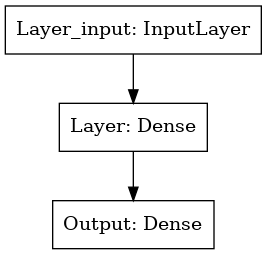

In [62]:
plot_model(model, to_file='model.png')

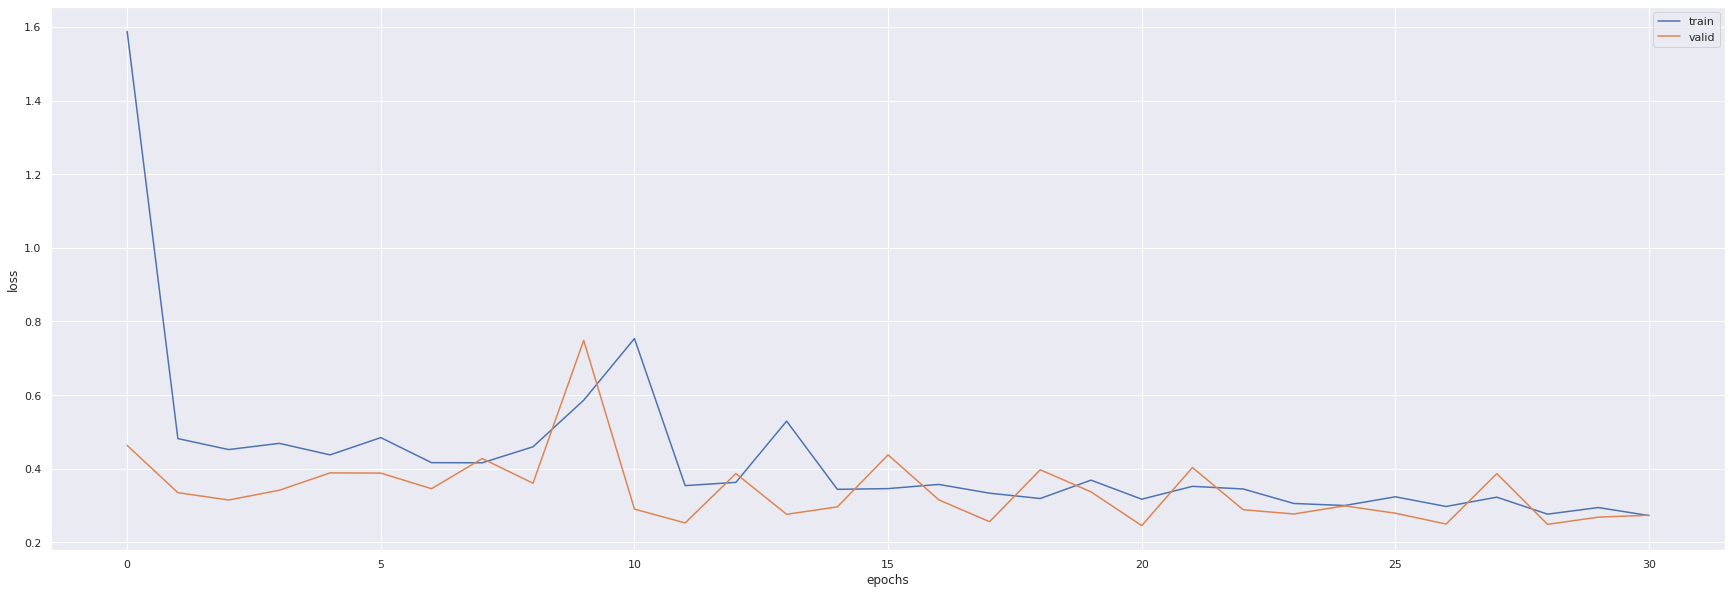

In [63]:
sns.set()
plt.rcParams['figure.figsize'] = (30, 10)
train_val = plt.plot(training.history['loss'], label='train')
valid_val = plt.plot(training.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

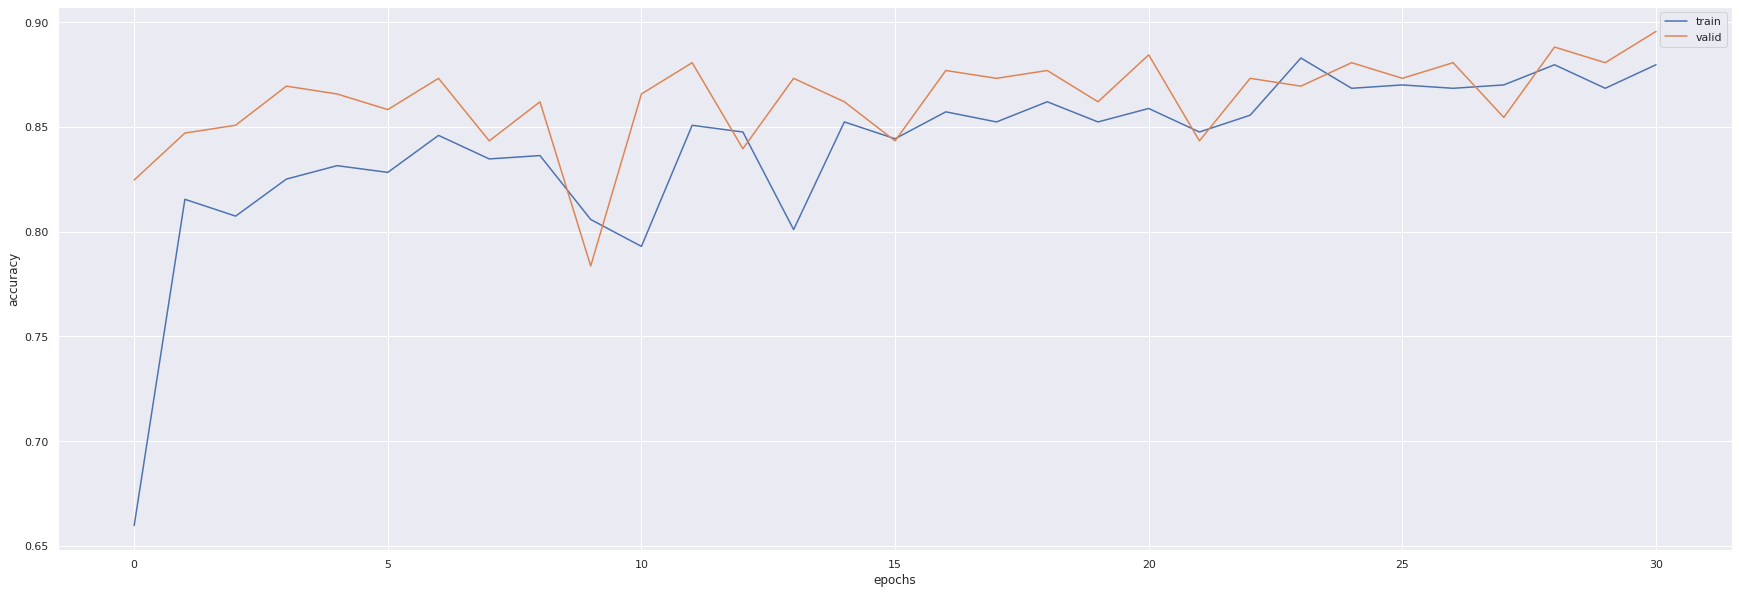

In [64]:
sns.set()
plt.rcParams['figure.figsize'] = (30, 10)
train_val = plt.plot(training.history['accuracy'], label='train')
valid_val = plt.plot(training.history['val_accuracy'], label='valid')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer (Dense)                (None, 120)               1920      
_________________________________________________________________
Output (Dense)               (None, 2)                 242       
Total params: 2,162
Trainable params: 2,162
Non-trainable params: 0
_________________________________________________________________


# 11. Best loss and accuracy on train

In [66]:
max(training.history['accuracy'])

0.882825

In [67]:
min(training.history['loss'])

0.27287241309450677

# 12. Best loss and accuracy on test

In [68]:
max(training.history['val_accuracy'])

0.89552241563797

In [69]:
min(training.history['val_loss'])

0.245621516855795

# 13. Loading best model

In [70]:
model = load_model('model.hdf5')

# 14. Saving results

In [71]:
predicted = model.predict_classes(x_test)

In [72]:
df_test['Survived'] = predicted
df_test[['PassengerId', 'Survived']].to_csv('kaggle_submission.csv', index = False)